In [1]:
import numpy as np
import pickle
from tabulate import tabulate
import matplotlib.pyplot as plt
import os
import dill
import pandas as pd

In [4]:
def data_smooth(data,n_avg):
    ind_vec = np.arange(n_avg,len(data)+1,n_avg)
    data_avg = []
    for ind in ind_vec:
        data_avg.append(np.mean(data[ind-n_avg:ind]))
    return data_avg


def sort_loss(val):
    return val[1]

def load_trials(fname):
    print('Loading trials...')
    trials = pickle.load(open(fname,'rb'), encoding="bytes")
    for i in range(len(trials.trials)):
        for key in trials.trials[i]['misc']['vals'].keys():
            trials.trials[i]['misc']['vals'][key] = round(trials.trials[i]['misc']['vals'][key][0],4)
    tab_data = [[i, trials.losses()[i], trials.trials[i]['result']['loss_runs']] for i in range(len(trials.trials))]
    tab_data.sort(key = sort_loss, reverse = True)
    print(tabulate(tab_data, headers = ['Run No', 'Loss', 'Loss Runs']))

    tab_data = [[i, trials.losses()[i], trials.trials[i]['misc']['vals']] for i in range(len(trials.trials))]
    tab_data.sort(key = sort_loss, reverse = True)
    print(tabulate(tab_data))
    return trials

def plot_R_run(trials,run_no):
    r_data = trials.trials[run_no]['result']['loss_episodes']
    N_avg = 100
    for run_data in r_data:
        R_plot = data_smooth(run_data, N_avg)
        plt.plot((np.arange(len(R_plot)) + 1) * N_avg, R_plot)
#     plt.xlim((0, 2100))
#     plt.ylim((-550, 0))
    plt.show()

In [11]:
trials = load_trials('opt_lander_2_3.pkl')

Loading trials...
  Run No    Loss  Loss Runs
--------  ------  --------------------------------------------------------------------------------------------------------------------------------------------------------
       4  758955  [754397.2611965791, 768672.5013445839, 740808.7243163838, 758170.124237671, 755280.42577262, 746618.1876172444, 753341.4550779215, 752807.9017510985]
       1  751528  [733941.8559624492, 746490.1757996911, 736005.5359559841, 749451.0786789734, 738955.5930147991, 754354.8250738829, 719236.4333540164, 762095.1153797943]
       0  742660  [739042.1955996803, 739059.199485194, 734866.4260647444, 742079.4306336805, 746775.246018078, 745557.651336098, 735299.8286013221, 734109.439389143]
       3  721215  [702708.3085548189, 732732.2997349831, 716578.0854578554, 715805.4522359399, 719200.2368374872, 716890.7382022305, 709328.920542872, 713217.7643745204]
       2  707732  [694443.6747184915, 704128.7601577825, 700246.5764216543, 719531.7196643222, 700933.82059

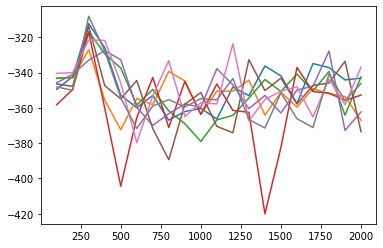

In [10]:
%matplotlib inline
plot_R_run(trials,2)